In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import cv2
import imghdr

In [5]:
data_dir='/content/drive/MyDrive/archive (5)/Training'
image_list,label_list=[],[]
all_labels=['glioma','meningioma','notumor','pituitary']
bin_labl=[0,1,2,3]
temp=-1
image_ext=['jpeg','jpg','png']

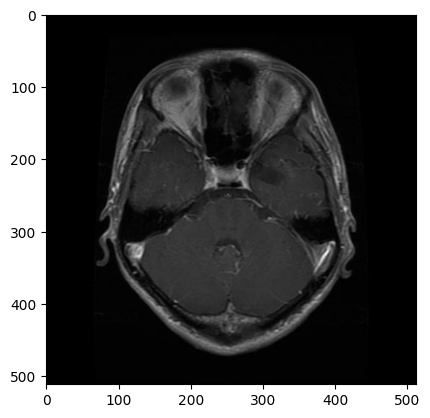

In [6]:
img=cv2.imread(os.path.join('Data','Testing','/content/drive/MyDrive/archive (5)/Testing/glioma/Te-glTr_0001.jpg'))
# img.shape
import matplotlib.pyplot as plt
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# img.shape
plt.imshow(img)

In [7]:
from PIL import Image
import os

# def resize_images_in_folder(folder_path, target_size=(256, 256)):
#     for filename in os.listdir(folder_path):
#         img_path = os.path.join(folder_path, filename)

#         try:
#             img = Image.open(img_path)

#             # Convert image to RGB mode if it's in the 'P' mode
#             if img.mode != 'RGB':
#                 img = img.convert('RGB')

#             img_resized = img.resize(target_size)
#             img_resized.save(img_path)
#         except Exception as e:
#             print(f"Error processing {img_path}: {e}")

# # Replace 'folder1', 'folder2', 'folder3', and 'folder4' with your actual folder paths
# folders = ['/content/drive/MyDrive/Brain_tumor/Testing/glioma',
#            '/content/drive/MyDrive/Brain_tumor/Testing/meningioma',
#            '/content/drive/MyDrive/Brain_tumor/Testing/notumor',
#            '/content/drive/MyDrive/Brain_tumor/Testing/pituitary']

# for folder in folders:
#     resize_images_in_folder(folder)


In [8]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 5712 files belonging to 4 classes.


In [11]:
data_iterator=data.as_numpy_iterator()
data_iterator

In [12]:
batch=data_iterator.next()
batch[1]

array([1, 2, 2, 3, 1, 3, 3, 1, 0, 0, 3, 0, 1, 2, 1, 2, 0, 2, 3, 0, 3, 2,
       0, 2, 0, 1, 0, 1, 3, 2, 1, 3], dtype=int32)

In [13]:
from PIL import Image
def convert_image_to_array(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array

In [14]:
# import PIL
for dir in all_labels:
  brn_img_list=os.listdir(f"{data_dir}/{dir}/")
  temp+=1
  for files in brn_img_list:
    try:
      img_path=f"{data_dir}/{dir}/{files}"
      image_list.append(convert_image_to_array(img_path))
      label_list.append(bin_labl[temp])
    except:
        print(f"Error opening image at {img_path}")

In [15]:
print(tf.__version__)

2.12.0


In [16]:
import pandas as pd

label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()
#0-glioma, 1-meningioma, 2-notumor, 3-pituitary

2    1595
3    1457
1    1339
0    1321
dtype: int64

In [17]:
image_list[0].shape

(512, 512)

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(image_list,label_list,test_size=0.2,random_state=10)




In [ ]:
#x_train=np.array(x_train,dtype='object')/255.0
#x_test=np.array(x_test,dtype='object')/255.0
#x_train=x_train.reshape(-1,256,256,3)
#x_test=x_test.reshape(-1,256,256,3)

In [ ]:
#from keras.utils import to_categorical
#y_train=to_categorical(y_train)
#y_test=to_categorical(y_test)

In [19]:
import numpy as np
import cv2
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.applications import VGG16

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/archive (5)/Training',
    target_size=(256, 256),
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/archive (5)/Testing',
    target_size=(256, 256),
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)




def load_and_preprocess_images(image_list, input_shape):
    images = []
    for img_path in image_list:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, input_shape[:2])  # Resize the image to the desired input shape
        img = img.astype(np.float32) / 255.0  # Normalize the pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load the VGG16 model without top classification layers
vgg16_base = VGG16(include_top=False, input_shape=(256, 256, 3))

# Create a new model by adding top classification layers to VGG16
model = Sequential()
model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(4, activation="softmax"))

# Freeze the VGG16 layers so that only the top layers will be trained
for layer in vgg16_base.layers:
    layer.trainable = False


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
58889256/58889256 [==============================] - 3s 0us/step


In [20]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 23,104,580
Trainable params: 8,389,892
Non-trainable params: 14,714,688
_________________________________________________________________


In [22]:
history=model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10,
          validation_data=test_generator, validation_steps=len(test_generator))


Epoch 1/10
45/45 [==============================] - 1004s 22s/step - loss: 0.5480 - accuracy: 0.7878 - val_loss: 0.3813 - val_accuracy: 0.8497
Epoch 2/10
45/45 [==============================] - 41s 914ms/step - loss: 0.2441 - accuracy: 0.9153 - val_loss: 0.2738 - val_accuracy: 0.8932
Epoch 3/10
45/45 [==============================] - 40s 902ms/step - loss: 0.1783 - accuracy: 0.9386 - val_loss: 0.2787 - val_accuracy: 0.8772
Epoch 4/10
45/45 [==============================] - 40s 882ms/step - loss: 0.1418 - accuracy: 0.9548 - val_loss: 0.1949 - val_accuracy: 0.9314
Epoch 5/10
45/45 [==============================] - 40s 893ms/step - loss: 0.1108 - accuracy: 0.9690 - val_loss: 0.1544 - val_accuracy: 0.9436
Epoch 6/10
45/45 [==============================] - 40s 889ms/step - loss: 0.0881 - accuracy: 0.9778 - val_loss: 0.1322 - val_accuracy: 0.9550
Epoch 7/10
45/45 [==============================] - 40s 890ms/step - loss: 0.0701 - accuracy: 0.9858 - val_loss: 0.1320 - val_accuracy: 0.9588

In [23]:
history.history

{'loss': [0.5480365753173828,
  0.24408014118671417,
  0.1783103197813034,
  0.14177155494689941,
  0.11084593087434769,
  0.08808311074972153,
  0.07013232260942459,
  0.059460777789354324,
  0.05083601921796799,
  0.04473103955388069],
 'accuracy': [0.7878151535987854,
  0.9152660965919495,
  0.9385504126548767,
  0.9548319578170776,
  0.9690126180648804,
  0.9777660965919495,
  0.9858193397521973,
  0.9886204600334167,
  0.9928221106529236,
  0.9940476417541504],
 'val_loss': [0.3813020884990692,
  0.27377045154571533,
  0.2786838412284851,
  0.1948523223400116,
  0.15443311631679535,
  0.13216383755207062,
  0.13202491402626038,
  0.11335083097219467,
  0.11389867961406708,
  0.09432186931371689],
 'val_accuracy': [0.8497330546379089,
  0.893211305141449,
  0.8771929740905762,
  0.9313501119613647,
  0.9435545206069946,
  0.9549961686134338,
  0.9588100910186768,
  0.9656750559806824,
  0.9603356122970581,
  0.9687261581420898]}

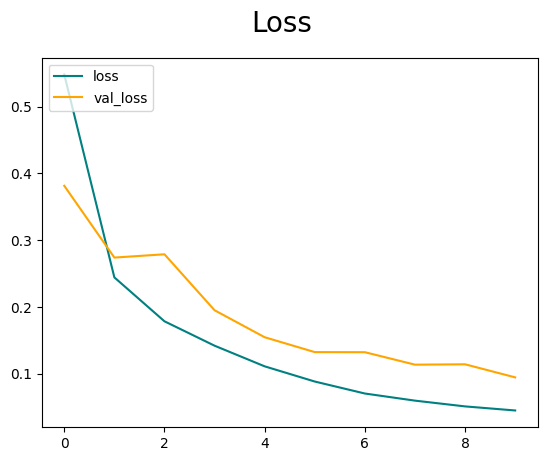

In [24]:
#plot performance
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [25]:
model.save("/content/drive/MyDrive/Model_save/bt.h5")

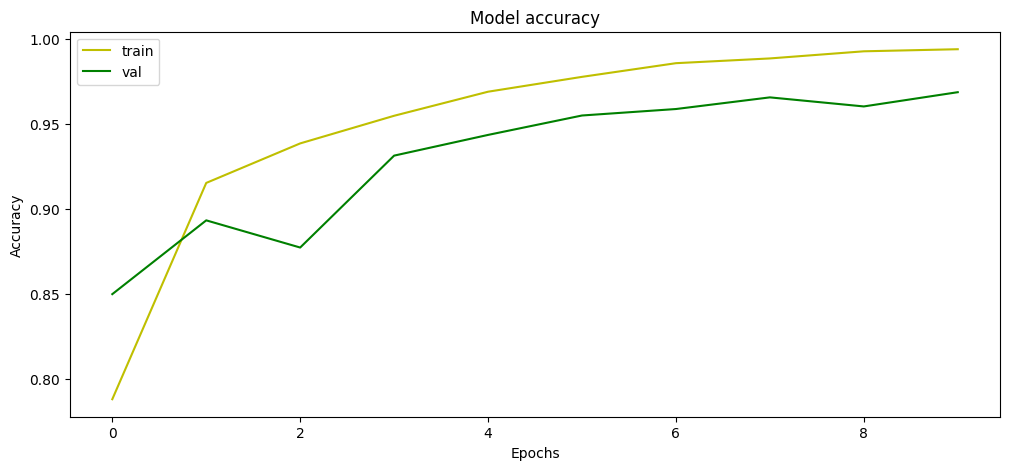

In [26]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='y')
plt.plot(history.history['val_accuracy'],color='g')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [27]:
# Assuming you have a data generator for the test data as well
test_data_generator = ImageDataGenerator(rescale=1.0 / 255.0)

# Create a test generator using the test data generator
test_generator = test_data_generator.flow(x_test, y_test, batch_size=128, shuffle=False)

# Evaluate the model on the test data using the test generator
scores = model.evaluate(test_generator, steps=None)

# Print the test accuracy
print(f"Test Accuracy: {scores[1] * 100:.2f}%")


ValueError: ignored

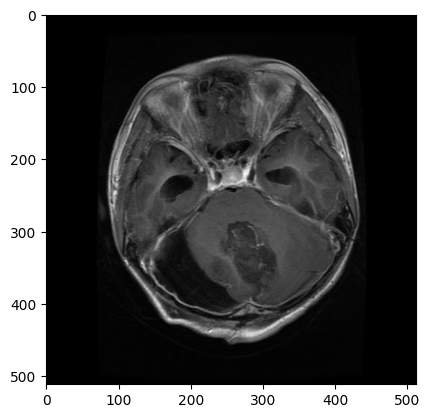

In [28]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
img=cv2.imread('/content/drive/MyDrive/archive (5)/Testing/glioma/Te-glTr_0000.jpg')
plt.imshow(img)
plt.show()

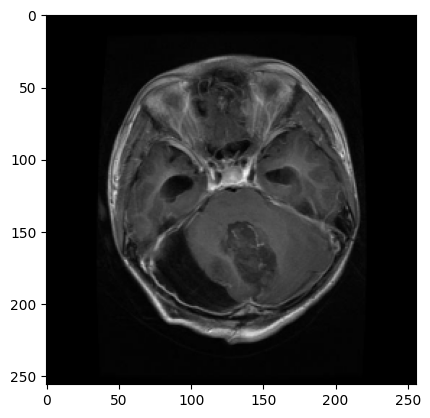

In [29]:
resz=tf.image.resize(img,(256,256))
plt.imshow((resz.numpy().astype(int)))
plt.show()

In [30]:
import numpy as np
np.expand_dims(resz,0)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [31]:
yhat=model.predict(np.expand_dims(resz/255,0))
yhat

1/1 [==============================] - 1s 855ms/step


array([[9.9826163e-01, 7.4628741e-04, 1.9850263e-04, 7.9357601e-04]],
      dtype=float32)

In [32]:
from keras.models import load_model
new_model=load_model(os.path.join('/content/drive/MyDrive/Model_save','bt.h5'))

In [33]:
final=new_model.predict(np.expand_dims(resz/255,0))

1/1 [==============================] - 0s 234ms/step


In [34]:
final.tolist()

[[0.9982616305351257,
  0.0007462874054908752,
  0.00019850263197440654,
  0.0007935760077089071]]

In [35]:
lst=final[0]
max1=max(lst)
def ind(lst):
  for i in range(4):
    if(max1==lst[i]):
      return i
k=ind(lst)

In [36]:

if k==0:
  print("Person is diagnozed with glioma")
elif k==1:
  print("Person is diagnozed with Meningioma")
elif k==3:
  print("Person is diagnozed with Pituitary tumor")
else:
  print("Person is not affected by brain tumor")

Person is diagnozed with glioma
